![LU Logo](https://www.lu.lv/fileadmin/user_upload/LU.LV/www.lu.lv/Logo/Logo_jaunie/LU_logo_LV_horiz.png)


# Pandas - vadošā Python datu analīzes bibliotēka

Pandas ir jaudīga atvērtā pirmkoda Python datu analīzes un apstrādes bibliotēka. 

Tā nodrošina divas galvenās datu struktūras: **Series** (1-dimensiju) and **DataFrame** (2-dimensiju), kas ļauj organizēt, attīrīt un apstrādāt datu kopas. Ar bagātīgu funkciju kopumu dažādu datu formātu lasīšanai un rakstīšanai, kā arī ar visaptverošiem rīkiem datu pārveidošanai un izpētei, Pandas ir kļuvusi par neaizstājamu rīku datu zinātnes un analītikas kopienās.

Pandas ir plaši izmantota atvērtā koda bibliotēka, kas tiek aktīvi attīstīta un ir ar lielisku dokumentāciju.

Vietne: http://pandas.pydata.org/

## Pandas radītājs — Vess Makkinijs (Wes McKinney)

Pandas izveidoja Vess Makkinijs 2008. gadā. Viņš sāka izstrādāt Pandas, strādājot uzņēmumā AQR Capital Management, galvenokārt tāpēc, ka viņam bija nepieciešams elastīgs rīks kvantitatīvai finanšu datu analīzei. Vēlāk Vess Makkinijs izdeva grāmatu "Python for Data Analysis", kurā ir detalizēti apskatīta Pandas bibliotēka, kas palīdzēja tās popularizēšanā datu zinātnes kopienā.

[Python for Data Analysis book 3rd ed](https://www.amazon.com/Python-Data-Analysis-Wrangling-Jupyter-dp-109810403X/dp/109810403X)


![Python for Data Analysis book](https://m.media-amazon.com/images/I/51J1XFfaD4L._SX379_BO1,204,203,200_.jpg)

## Nodarbības saturs

Mēs apskatīsim sekojošas tēmas:

* Pandas instalēšana
* Pandas datu struktūras
  * `Series`
  * `DataFrames`
  * `DateRange`
* datu nolasīšana no datnēm
* Pandas datu izvēle un indeksēšana
* Pandas datu apstrāde
* Pandas datu apkopošana un grupēšana
* Pandas datu vizualizācija

## Prasības priekšzināšanām

* Python sintakse
* Python datu tipi
* Python operatori
* Nosacījumu izteiksmes, zarošanās ar if, elif, else
* Cikli: for un while
* Funkcijas
* imports, moduļi un pakotnes
* Datu struktūras: saraksti, korteži, vārdnīcas, kopas
* Failu ievade/izvade
* Objektorientētās programmēšanas pamati - Klases un objekti
* NumPy pamati

## Nodarbības mērķi

Nodarbības beigās Jums ir jāspēj:

* instalēt Pandas
* izveidot Pandas `Series` un `DataFrames`
* nolasīt datus no datnēm
* izvēlēties un indeksēt Pandas datu struktūrās esošus datus
* apstrādāt Pandas datu struktūrās esošus datus
* apkopot un grupēt Pandas datu struktūrās esošus datus

---

## 1. tēma - Pandas uzstādīšana un pamatoperācijas

### 1.1. Pandas importēšana

In [1]:
# pārbaudīt vai mums ir pieejama Pandas bibliotēka
try:
    import pandas as pd
except ImportError:
    print("pandas not found")

# Retos gadījumos var rasties Pandas un Numpy versiju nesaderība.
# Šādos gadījumos varat mēģināt atjaunināt Numpy, izmantojot šādu komandu:
# !pip install --upgrade numpy
# Komandrindā tā būtu komanda: pip install --upgrade numpy

In [2]:
# drukāt Pandas versiju
print(f"pandas version: {pd.__version__}")

pandas version: 2.2.3


In [3]:
# we will also need numpy and matplotlib
# Pandas utilizes numpy and matplotlib under the hood
# thus you might need to install them as well

import numpy as np
# print version
print(f"numpy version: {np.__version__}")
import matplotlib.pyplot as plt
# print matplotlib version
print(f"matplotlib version: {plt.matplotlib.__version__}")


numpy version: 2.1.2
matplotlib version: 3.9.2


In [4]:
# setting the max_rows parameter
# max_rows is the maximum number of rows that will be displayed
#pd.reset_option('display.max_rows')
pd.options.display.max_rows = 40

---
### Pandas instalēšana

Vispirms mums ir jāinstalē Pandas, ja tas vēl nav izdarīts.

**Instalēšana no Jupyter Notebook šūnas:**

```python
!pip install pandas
```

Tas instalēs Pandas pašreizējā vidē (ir vēlams lietot Python virtuālo vidi).

**Instalēšana no komandrindas:**

```bash
pip install pandas
```

Šī komanda instalēs Pandas pašreizējā vidē.

---

Pandas ir daudz neobligāto atkarību, kuras ir jāinstalē atsevišķi:
[Pandas Optional Dependencies](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html#install-optional-dependencies) 

Piemēram, lai instalētu Pandas ar papildu atbalstu Excel datnēm, izmantojiet šādu komandu:

```bash
pip install "pandas[excel]"
```

Šī komanda instalēs piecas citas pakotnes, kas nepieciešamas, lai strādātu ar Excel failiem.

### DataFrame izveidošana

DataFrame ir visbūtiskākā Pandas datu struktūra. Tā ir divdimensiju, heterogēna tabulas veida datu struktūra ar maināmu izmēru un  marķētām (labeled) asīm (rindām un kolonnām). DataFrame ir līdzīga Excel spreadsheet vai SQL tabulai vai arī Series objektus saturošai vārdnīcai (dictionary of Series).

In [5]:
# one common data source of data is a dictionary
# here keys represend column names and values are lists of data

my_data = {
    'Pilsēta': ['Rīga', 'Daugavpils', 'Liepāja'],
    'Iedz.skaits': [630000, 82000, 69000]
}

df = pd.DataFrame(my_data) # df is very common abbreviation for DataFrame object variable name
df

,Pilsēta,Iedz.skaits
0,Rīga,630000
1,Daugavpils,82000
2,Liepāja,69000


In [6]:
# we can use an existing column as an index
# in this case we will save a reference to the new DataFrame object
df2 = df.set_index(['Pilsēta'])
df2

,Iedz.skaits
Pilsēta,
Rīga,630000
Daugavpils,82000
Liepāja,69000


In [7]:
# we can access the data by index
df2.loc["Rīga"]

Iedz.skaits    630000
Name: Rīga, dtype: int64

### Datu nolasīšana

In [8]:
# Pandas can read data not just from files but also from web URLs:

# city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
csv_url = "https://github.com/CaptSolo/LU_Python_2023/raw/main/notebooks/data/iedz_skaits_2018.csv"

city_data = pd.read_csv(csv_url, index_col=0)

# display first five columns - head() method
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [9]:
city_data

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073
...,...
Viļaka,1301
Viļānu novads,5659
Viļāni,2891


In [10]:
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [11]:
type(city_data)

pandas.core.frame.DataFrame

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(-25.0, 0, 'Sabile'),
  Text(0.0, 0, 'Rīga'),
  Text(25.0, 0, 'Auces novads'),
  Text(50.0, 0, 'Dobele'),
  Text(75.0, 0, 'Kandavas novads'),
  Text(100.0, 0, 'Lubāna'),
  Text(125.0, 0, 'Priekules novads'),
  Text(150.0, 0, 'Sigulda'),
  Text(175.0, 0, 'Vecumnieku novads'),
  Text(200.0, 0, '')])

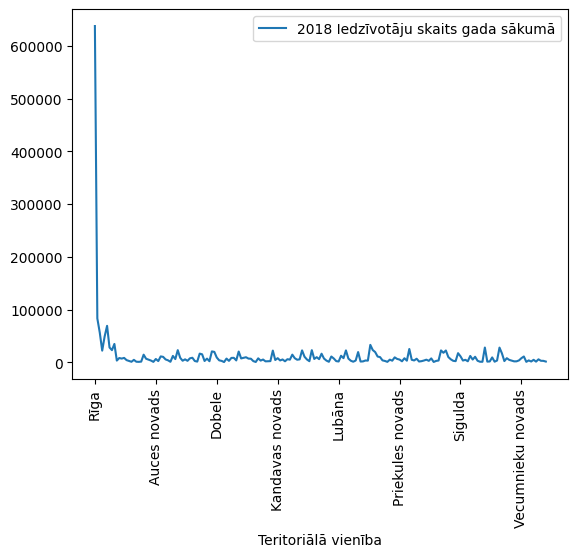

In [12]:
# we can plot the data immediately - by default it will plot all columns
# there are many options to customize the plot but default is usually a good start

city_data.plot()
# by default Pandas uses matplotlib for plotting - there are options to use other libraries
plt.xticks(rotation=90) # simple way to rotate x-axis labels

## 2. tēma - Pandas Series

**Series** ir viendimensiju objektu masīvs, kas satur vērtību (līdzīgu NumPy tipiem) virkni un ar to saistītu datu birku masīvu — indeksu.

**DataFrame** struktūra ir veidota uz Series objektu pamata.


In [13]:
# one way to create a series from a DataFrame is to select a single column
# if your DataFrame has only one column you can use squeeze() method
city_series = city_data.squeeze()
# doc of Sqeeze: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.squeeze.html
type(city_series)

pandas.core.series.Series

In [14]:
city_series.head()

Teritoriālā vienība
Rīga          637971
Daugavpils     83250
Jelgava        56383
Jēkabpils      22188
Jūrmala        49073
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [15]:
# we can get single value by index
print(city_series["Liepāja"]) # the __str__ method is called
city_series["Liepāja"] # the __repr__ method is called, note the difference

69180


np.int64(69180)

In [16]:
# we can perform operations on the series
city_series.sum()

np.int64(2254964)

In [17]:
# we can generate basic statistics for the series
city_series.describe()

count       186.000000
mean      12123.462366
std       47444.415575
min         503.000000
25%        2660.750000
50%        5238.500000
75%        9831.750000
max      637971.000000
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: float64

In [18]:
# we can filter the data by some condition
city_series[city_series < 1000]

Teritoriālā vienība
Staicele     877
Ape          850
Durbe        503
Subate       635
Līgatne      994
Pāvilosta    894
Ainaži       689
Piltene      903
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [22]:
bitmap = city_series < 1000 # we generate a bitmap of the same size as the series
# now we will show a sample of our bitmap
bitmap.sample(20)   # kādēļ sample() nevis head()

Teritoriālā vienība
Līvānu novads       False
Ludza               False
Līgatnes novads     False
Grobiņas novads     False
Rugāju novads       False
Balvu novads        False
Engures novads      False
Alūksne             False
Alūksnes novads     False
Rīga                False
Dundagas novads     False
Cēsis               False
Subate               True
Aknīste             False
Viļakas novads      False
Pārgaujas novads    False
Talsu novads        False
Vārkavas novads     False
Daugavpils          False
Viļāni              False
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: bool

In [23]:
# we can select by the bitmap then sort the data
city_series[bitmap].sort_index()

Teritoriālā vienība
Ainaži       689
Ape          850
Durbe        503
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Subate       635
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

In [24]:
city_series[bitmap].sort_values(ascending=False)

Teritoriālā vienība
Līgatne      994
Piltene      903
Pāvilosta    894
Staicele     877
Ape          850
Ainaži       689
Subate       635
Durbe        503
Name: 2018 Iedzīvotāju skaits gada sākumā, dtype: int64

### Series izveide no saraksta



In [25]:
# creating Pandas Series

s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

0    1.0
1    4.0
2    3.5
3    3.0
4    NaN
5    0.0
6   -5.0
dtype: float64

In [26]:
# we can perform operations on whole Series in one go:

s + 4

0    5.0
1    8.0
2    7.5
3    7.0
4    NaN
5    4.0
6   -1.0
dtype: float64

In [ ]:
# NaN = Not a Number (used for missing numerical values)
# https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [27]:
s2 = s * 4 
s2

0     4.0
1    16.0
2    14.0
3    12.0
4     NaN
5     0.0
6   -20.0
dtype: float64

In [28]:
s2 ** 2

0     16.0
1    256.0
2    196.0
3    144.0
4      NaN
5      0.0
6    400.0
dtype: float64

In [ ]:
### Often Series have an index identifying each data point with a label 

In [29]:
labeledSeries = pd.Series([24, 77, -35, 31], index=['d', 'e', 'a', 'g'])
labeledSeries

d    24
e    77
a   -35
g    31
dtype: int64

In [32]:
## Working with Series data (with some similarities to dictionaries)

labeledSeries['g']

np.int64(31)

In [33]:
labeledSeries.index

Index(['d', 'e', 'a', 'g'], dtype='object')

In [34]:
# Checking if a label is in the Series
'd' in labeledSeries

True

In [35]:
# we can get values from Series
labeledSeries.values

array([ 24,  77, -35,  31])

In [36]:
# Series Values are NumPy arrays
type(labeledSeries.values)

numpy.ndarray

In [37]:
# we can select multiple values by index
labeledSeries[['a','d']] # NOTE double list brackets!!

a   -35
d    24
dtype: int64

In [ ]:
# To generalize, Series behaves like a fixed-length, ordered dictionary with extra helper methods

### Series var tikt izveidotas no vārdnīcas, nododot to pd.Series()

In [38]:
citydict = {'Rīga': 630000, 'Daugavpils': 82000, 'Liepāja': 69000, 'Carnikava': 4800}

In [39]:
cseries = pd.Series(citydict)
cseries

Rīga          630000
Daugavpils     82000
Liepāja        69000
Carnikava       4800
dtype: int64

In [40]:
## Overwriting default index
clist = ['Jūrmala', 'Rīga', 'Daugavpils', 'Ogre', 'Liepāja']

cseries2 = pd.Series(citydict, index = clist)
cseries2

Jūrmala            NaN
Rīga          630000.0
Daugavpils     82000.0
Ogre               NaN
Liepāja        69000.0
dtype: float64

In [ ]:
# notice Carnikava was lost, since the new index does not have it
# and order was preserved from the given index list

In [41]:
# find missing data
cseries2.isnull()

Jūrmala        True
Rīga          False
Daugavpils    False
Ogre           True
Liepāja       False
dtype: bool

In [43]:
cseries2.dropna()

Rīga          630000.0
Daugavpils     82000.0
Liepāja        69000.0
dtype: float64

In [44]:
cseries2

Jūrmala            NaN
Rīga          630000.0
Daugavpils     82000.0
Ogre               NaN
Liepāja        69000.0
dtype: float64

In [45]:
cseries3 = cseries + cseries2
cseries3

Carnikava           NaN
Daugavpils     164000.0
Jūrmala             NaN
Liepāja        138000.0
Ogre                NaN
Rīga          1260000.0
dtype: float64

In [ ]:
# so NaN + number = NaN

In [46]:
# we can name the table and its index column

cseries.name = "Latvian Cities"
cseries.index.name = "City"
cseries

City
Rīga          630000
Daugavpils     82000
Liepāja        69000
Carnikava       4800
Name: Latvian Cities, dtype: int64

In [47]:
cseries.index

Index(['Rīga', 'Daugavpils', 'Liepāja', 'Carnikava'], dtype='object', name='City')

In [48]:
# changing Index names
cseries.index = ['RīgaIsOld', 'Daugavpils', 'LiepājaWind', 'CarnikavaIsNotaCity']
cseries

RīgaIsOld              630000
Daugavpils              82000
LiepājaWind             69000
CarnikavaIsNotaCity      4800
Name: Latvian Cities, dtype: int64

In [49]:
# Series values are mutable
cseries['RīgaIsOld'] = 625000
cseries

RīgaIsOld              625000
Daugavpils              82000
LiepājaWind             69000
CarnikavaIsNotaCity      4800
Name: Latvian Cities, dtype: int64

In [50]:
# We can use rename() method to rename individual elements
cseries4 = cseries.rename(index={'RīgaIsOld':'RīgaRocks'})

In [51]:
cseries4["RīgaRocks"]

np.int64(625000)

### Uz skaitļiem (pozīciju) un uz birkām balstīti indeksi

Darbs ar Pandas objektiem, kas ir indeksēti ar veseliem skaitļiem, bieži mulsina jaunus lietotājus, jo ir dažas atšķirības indeksēšanas semantikā salīdzinājumā ar Python iebūvētajām datu struktūrām, piemēram, sarakstiem un kortežiem. Piemēram, jūs varētu negaidīt, ka šāda komanda izraisīs kļūdu:


In [52]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [53]:
try:
    ser[-1]
except KeyError as e:
    print(f"KeyError: {e}")

KeyError: -1


Šajā gadījumā Pandas varētu "pāriet" uz veselu skaitļu indeksēšanu, taču to ir grūti vispārīgi īstenot, neradot kļūdas.

Piemēram, ja mums ir indekss ar vērtībām 0, 1, 2, tad ir grūti viennozīmīgi noteikt, ko lietotājs vēlas izmantot — uz birkām balstītu vai uz pozīciju balstītu indeksēšanu.

In [54]:
ser[2]

np.float64(2.0)

In [ ]:
## With a non-integer index there is no potential for ambiguity:

In [55]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1] # note FutureWarning

/var/folders/lp/4x3s75t55cbf6dq_k1jcxllm0000gn/T/ipykernel_7402/2963966822.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ser2[-1] # note FutureWarning


np.float64(2.0)

In [56]:
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [57]:
# Regular slicing with an explicit index uses the index:
ser2[::-1]

c    2.0
b    1.0
a    0.0
dtype: float64

In [ ]:
## To keep things consistent, if you have an axis index containing integers, data selection
## will always be label-oriented. 

# For more precise handling, use loc (for labels) or iloc (for integer index):

In [58]:
ser2.loc['b']

np.float64(1.0)

In [59]:
# Note: label indexing includes the endpoint, integer indexing does not
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [60]:
ser.iloc[:1]

0    0.0
dtype: float64

* loc iegūst rindas (vai kolonnas) ar konkrētām birkām no indeksa.

* iloc iegūst rindas (vai kolonnas) konkrētās indeksa pozīcijās (tāpēc tas pieņem tikai veselus skaitļus).

## 3. tēma - Date Range izveide

Datumu diapazoni tiek izmantoti kā indeksi laika sēriju datiem:
* https://pandas.pydata.org/docs/user_guide/10min.html#time-series

In [61]:
# let's get today's data in the form of YYYYMMDD string
from datetime import datetime
today = datetime.today().strftime("%Y%m%d")
today

'20251028'

In [62]:
dates = pd.date_range(today, periods=15)
dates

DatetimeIndex(['2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31',
               '2025-11-01', '2025-11-02', '2025-11-03', '2025-11-04',
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range(today, periods=15, freq="W") # note default W-SUN means weeks starting on Sunday


DatetimeIndex(['2025-11-02', '2025-11-09', '2025-11-16', '2025-11-23',
               '2025-11-30', '2025-12-07', '2025-12-14', '2025-12-21',
               '2025-12-28', '2026-01-04', '2026-01-11', '2026-01-18',
               '2026-01-25', '2026-02-01', '2026-02-08'],
              dtype='datetime64[ns]', freq='W-SUN')

In [65]:
# let's start with Monday
pd.date_range(today, periods=7, freq="W-MON")

DatetimeIndex(['2025-11-03', '2025-11-10', '2025-11-17', '2025-11-24',
               '2025-12-01', '2025-12-08', '2025-12-15'],
              dtype='datetime64[ns]', freq='W-MON')

In [ ]:
# more on data_range frequency here
# https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

In [67]:
# Datetime is in the standard library (so all Python installations will have it)
from datetime import date
date.today()

datetime.date(2025, 10, 28)

In [68]:
# We can get a data range starting from today
months = pd.date_range(date.today().strftime("%Y-%m-%d"), periods = 10, freq='BMS')
# BMS means Business Month Start in US calendar
months

DatetimeIndex(['2025-11-03', '2025-12-01', '2026-01-01', '2026-02-02',
               '2026-03-02', '2026-04-01', '2026-05-01', '2026-06-01',
               '2026-07-01', '2026-08-03'],
              dtype='datetime64[ns]', freq='BMS')

## 4. tēma - DataFrame

DataFrame ir visbiežāk izmantotā Pandas datu struktūra. Tā ir 2-dimensiju datu tabula, kas satur sakārtotu kolonnu kolekciju.
- katrai kolonnai var būt atšķirīgs datu tips (skaitlisks, teksts, boolean utt.).

DataFrame ir gan rindu, gan kolonnu indeksi.

To var uztvert kā sakārtotu Series vārdnīcu, kur visām Series ir kopīgs rindas indekss.

DataFrame esošie dati tiek glabāti kā viens vai vairāki divdimensiju bloki (līdzīgi kā ndarray).

In [ ]:
# There are different ways for creating DataFrames

# A common way is to create it from a dict of equal-length lists or NumPy arrays

In [69]:
# again column names are keys and values are lists of data
data = {'city': ['Riga', 'Riga', 'Riga', 'Jurmala', 'Jurmala', 'Jurmala'],
        'year': [1990, 2000, 2018, 2001, 2002, 2003],
        'popul': [0.9, 0.75, 0.62, 0.09, 0.08, 0.06]}

df = pd.DataFrame(data)
df

,city,year,popul
0,Riga,1990,0.90
1,Riga,2000,0.75
2,Riga,2018,0.62
3,Jurmala,2001,0.09
4,Jurmala,2002,0.08
5,Jurmala,2003,0.06


In [70]:
# we can specify the order of columns
df2 = pd.DataFrame(data, columns=['year','city', 'popul','budget'])
# note we did not previously have budget column, thus it will be filled with NaN
df2

,year,city,popul,budget
0,1990,Riga,0.90,NaN
1,2000,Riga,0.75,NaN
2,2018,Riga,0.62,NaN
3,2001,Jurmala,0.09,NaN
4,2002,Jurmala,0.08,NaN
5,2003,Jurmala,0.06,NaN


In [ ]:
# missing column simply given Nans

In [71]:
# we can set values for the new column all at once
df2['budget']=300000000
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000000
1,2000,Riga,0.75,300000000
2,2018,Riga,0.62,300000000
3,2001,Jurmala,0.09,300000000
4,2002,Jurmala,0.08,300000000
5,2003,Jurmala,0.06,300000000


In [72]:
# we could pass specific values for the new column as well
df2['budget']=[300000, 250000, 400000, 200000, 250000, 200000] # need to pass all values
df2

,year,city,popul,budget
0,1990,Riga,0.90,300000
1,2000,Riga,0.75,250000
2,2018,Riga,0.62,400000
3,2001,Jurmala,0.09,200000
4,2002,Jurmala,0.08,250000
5,2003,Jurmala,0.06,200000


In [ ]:
# Many ways of changing individual values

## Recommended way of changing in place (same dataframe)

In [73]:
# iat will let you assign values in specific cells by numerical index
df2.iat[3,2] = 0.063 # so 3 is the row index, 2 is the column index
df2

,year,city,popul,budget
0,1990,Riga,0.900,300000
1,2000,Riga,0.750,250000
2,2018,Riga,0.620,400000
3,2001,Jurmala,0.063,200000
4,2002,Jurmala,0.080,250000
5,2003,Jurmala,0.060,200000


In [74]:
# selecting single column will give you series
df2["budget"]

0    300000
1    250000
2    400000
3    200000
4    250000
5    200000
Name: budget, dtype: int64

In [75]:
type(df2["budget"])

pandas.core.series.Series

In [76]:
# if you want a single column dataframe then we use double brackets
df2[["budget"]]

,budget
0,300000
1,250000
2,400000
3,200000
4,250000
5,200000


In [77]:
# type
type(df2[["budget"]])

pandas.core.frame.DataFrame

In [78]:
# delete column by its name
del df2["budget"]
# alterantive would be to use drop method
# see docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df2

,year,city,popul
0,1990,Riga,0.900
1,2000,Riga,0.750
2,2018,Riga,0.620
3,2001,Jurmala,0.063
4,2002,Jurmala,0.080
5,2003,Jurmala,0.060


### DateRange lietošana DataFrame izveidei

In [79]:
# we still have our DateRange, we will use as an index
dates

DatetimeIndex(['2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31',
               '2025-11-01', '2025-11-02', '2025-11-03', '2025-11-04',
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11'],
              dtype='datetime64[ns]', freq='D')

In [80]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))
# We passed 15 rows of 5 random elements and set index to dates and columns to our basic list elements
df

,A,B,C,D,E
2025-10-28,0.067574,-1.663429,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,-0.324207,0.875657
2025-10-30,1.396754,1.375232,-0.287661,-0.445386,-0.410310
2025-10-31,0.553592,0.153288,0.051357,0.200891,1.112625
2025-11-01,0.128866,0.172018,-1.246255,-2.603606,-1.291328
2025-11-02,2.031861,0.760779,0.563546,-1.243628,-0.519284
2025-11-03,-0.033007,-0.188860,-2.175321,0.561191,-0.043479
2025-11-04,0.085616,0.178966,-1.595650,-0.871960,-1.432714
2025-11-05,-1.184081,-1.048304,-0.844961,0.155742,0.162751
2025-11-06,0.459971,-0.567195,1.510716,0.014941,-0.580227


In [81]:
# we can also create a DataFrame from a dict where values are various types
df2 = pd.DataFrame({ 'A' : 1.,
                      'B' : pd.Timestamp('20130102'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
#most columns need matching length!

Categorical data type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
    

In [ ]:
## s = pd.Series([1,4,3.5,3,np.nan,0,-5])
s

In [82]:
# again we either supply one value or exact number of values
df3 = pd.DataFrame({ 'A' : 1.,
                   'B' : pd.Timestamp('20180523'),
                   'C' : s,
                   'D' : [x**2 for x in range(7)],
                   'E' : pd.Categorical(['test','train']*3+["train"]),
                   'F' : 'aha'
                   })
df3

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [ ]:
## different datatypes for columns! 

In [83]:
df3.dtypes

A          float64
B    datetime64[s]
C          float64
D            int64
E         category
F           object
dtype: object

In [84]:
df3.head()

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [85]:
df3.tail(3)

,A,B,C,D,E,F
4,1.0,2018-05-23,NaN,16,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


In [86]:
df.index

DatetimeIndex(['2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31',
               '2025-11-01', '2025-11-02', '2025-11-03', '2025-11-04',
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11'],
              dtype='datetime64[ns]', freq='D')

In [87]:
df3.index

RangeIndex(start=0, stop=7, step=1)

In [88]:
df3.values

array([[1.0, Timestamp('2018-05-23 00:00:00'), 1.0, 0, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 4.0, 1, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.5, 4, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 3.0, 9, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), nan, 16, 'test', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), 0.0, 25, 'train', 'aha'],
       [1.0, Timestamp('2018-05-23 00:00:00'), -5.0, 36, 'train', 'aha']],
      dtype=object)

### Dataframe statistika

In [89]:
# describe method gives basic statistics for numerical columns by default
df3.describe()

,A,B,C,D
count,7.0,7,6.000000,7.000000
mean,1.0,2018-05-23 00:00:00,1.083333,13.000000
min,1.0,2018-05-23 00:00:00,-5.000000,0.000000
25%,1.0,2018-05-23 00:00:00,0.250000,2.500000
50%,1.0,2018-05-23 00:00:00,2.000000,9.000000
75%,1.0,2018-05-23 00:00:00,3.375000,20.500000
max,1.0,2018-05-23 00:00:00,4.000000,36.000000
std,0.0,NaN,3.352859,13.490738


In [90]:
# info method gives more detailed information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 2025-10-28 to 2025-11-11
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       15 non-null     float64
 1   B       15 non-null     float64
 2   C       15 non-null     float64
 3   D       15 non-null     float64
 4   E       15 non-null     float64
dtypes: float64(5)
memory usage: 720.0 bytes


In [91]:
# we can get statistics for non-numerical columns as well
df3.describe(include='all') 
# note how NaNs are shown where statistics are not applicable


,A,B,C,D,E,F
count,7.0,7,6.000000,7.000000,7,7
unique,NaN,NaN,NaN,NaN,2,1
top,NaN,NaN,NaN,NaN,train,aha
freq,NaN,NaN,NaN,NaN,4,7
mean,1.0,2018-05-23 00:00:00,1.083333,13.000000,NaN,NaN
min,1.0,2018-05-23 00:00:00,-5.000000,0.000000,NaN,NaN
25%,1.0,2018-05-23 00:00:00,0.250000,2.500000,NaN,NaN
50%,1.0,2018-05-23 00:00:00,2.000000,9.000000,NaN,NaN
75%,1.0,2018-05-23 00:00:00,3.375000,20.500000,NaN,NaN
max,1.0,2018-05-23 00:00:00,4.000000,36.000000,NaN,NaN


In [ ]:
# we can show statistics for non-numericals only
df3.describe(include=['object', 'category'])

In [ ]:
# Sorting

In [92]:
df.sort_index(axis=1,ascending=False)
# this sorts columns in reverse order

,E,D,C,B,A
2025-10-28,0.593256,0.404573,0.257480,-1.663429,0.067574
2025-10-29,0.875657,-0.324207,1.892426,0.749404,0.248167
2025-10-30,-0.410310,-0.445386,-0.287661,1.375232,1.396754
2025-10-31,1.112625,0.200891,0.051357,0.153288,0.553592
2025-11-01,-1.291328,-2.603606,-1.246255,0.172018,0.128866
2025-11-02,-0.519284,-1.243628,0.563546,0.760779,2.031861
2025-11-03,-0.043479,0.561191,-2.175321,-0.188860,-0.033007
2025-11-04,-1.432714,-0.871960,-1.595650,0.178966,0.085616
2025-11-05,0.162751,0.155742,-0.844961,-1.048304,-1.184081
2025-11-06,-0.580227,0.014941,1.510716,-0.567195,0.459971


In [ ]:
## Sort by Axis in reverse

In [93]:
df.sort_index(axis=0,ascending=False)
# here we have sort by index in reverse order

,A,B,C,D,E
2025-11-11,0.808302,0.755067,-0.094368,0.170401,-0.515005
2025-11-10,-0.469453,0.294995,-0.205977,0.821718,0.988851
2025-11-09,-0.008596,0.139597,1.383606,-0.473144,1.035080
2025-11-08,0.610389,0.567755,0.884599,-0.982696,0.260179
2025-11-07,-0.206834,1.327006,-0.149315,-0.682419,-0.245072
2025-11-06,0.459971,-0.567195,1.510716,0.014941,-0.580227
2025-11-05,-1.184081,-1.048304,-0.844961,0.155742,0.162751
2025-11-04,0.085616,0.178966,-1.595650,-0.871960,-1.432714
2025-11-03,-0.033007,-0.188860,-2.175321,0.561191,-0.043479
2025-11-02,2.031861,0.760779,0.563546,-1.243628,-0.519284


In [94]:
# more commonly we want to sort by values in some column
df3.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
0,1.0,2018-05-23,1.0,0,test,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [ ]:
# Notice that NaN becomes last

In [95]:
# we can sort by multiple columns and supply sorting directions for each
df3.sort_values(by=['E','C'], ascending=[True,False])
# so here we lexicographically sort by E and when we have ties we sort by C numerically in reverse


,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
0,1.0,2018-05-23,1.0,0,test,aha
4,1.0,2018-05-23,NaN,16,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
3,1.0,2018-05-23,3.0,9,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
6,1.0,2018-05-23,-5.0,36,train,aha


### Datu izvēle (selection) 

Piezīme: lai gan standarta Python / Numpy izteiksmes datu atlasei un iestatīšanai ir intuitīvas un ērtas interaktīvam darbam, ražošanas kodā ieteicams izmantot optimizētās Pandas datu piekļuves metodes — **.at**, **.iat**, **.loc** un **.iloc**.

In [96]:
df3['D']

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: D, dtype: int64

In [97]:
df3[:5] # first 5 rows

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,0,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [98]:
df3[2:5]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [99]:
df3[2:5:2]

,A,B,C,D,E,F
2,1.0,2018-05-23,3.5,4,test,aha
4,1.0,2018-05-23,NaN,16,test,aha


In [100]:
df3[::-1]

,A,B,C,D,E,F
6,1.0,2018-05-23,-5.0,36,train,aha
5,1.0,2018-05-23,0.0,25,train,aha
4,1.0,2018-05-23,NaN,16,test,aha
3,1.0,2018-05-23,3.0,9,train,aha
2,1.0,2018-05-23,3.5,4,test,aha
1,1.0,2018-05-23,4.0,1,train,aha
0,1.0,2018-05-23,1.0,0,test,aha


### Datu izvēle pēc birkas

Lai atlasītu datus lietojot birkas:

In [101]:
df

,A,B,C,D,E
2025-10-28,0.067574,-1.663429,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,-0.324207,0.875657
2025-10-30,1.396754,1.375232,-0.287661,-0.445386,-0.410310
2025-10-31,0.553592,0.153288,0.051357,0.200891,1.112625
2025-11-01,0.128866,0.172018,-1.246255,-2.603606,-1.291328
2025-11-02,2.031861,0.760779,0.563546,-1.243628,-0.519284
2025-11-03,-0.033007,-0.188860,-2.175321,0.561191,-0.043479
2025-11-04,0.085616,0.178966,-1.595650,-0.871960,-1.432714
2025-11-05,-1.184081,-1.048304,-0.844961,0.155742,0.162751
2025-11-06,0.459971,-0.567195,1.510716,0.014941,-0.580227


In [102]:
dates

DatetimeIndex(['2025-10-28', '2025-10-29', '2025-10-30', '2025-10-31',
               '2025-11-01', '2025-11-02', '2025-11-03', '2025-11-04',
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11'],
              dtype='datetime64[ns]', freq='D')

In [103]:
dates[0]

Timestamp('2025-10-28 00:00:00')

In [104]:
df.loc[dates[0]] # so we used specific date as index to ge the row data as Series

A    0.067574
B   -1.663429
C    0.257480
D    0.404573
E    0.593256
Name: 2025-10-28 00:00:00, dtype: float64

In [105]:
df.loc[dates[2:5]]

,A,B,C,D,E
2025-10-30,1.396754,1.375232,-0.287661,-0.445386,-0.410310
2025-10-31,0.553592,0.153288,0.051357,0.200891,1.112625
2025-11-01,0.128866,0.172018,-1.246255,-2.603606,-1.291328


### Atlase uz vairākām asīm pēc birkas:

In [106]:
df.loc[:, ['A','B','C']]
# we get all rows and only columns A, B and C

,A,B,C
2025-10-28,0.067574,-1.663429,0.257480
2025-10-29,0.248167,0.749404,1.892426
2025-10-30,1.396754,1.375232,-0.287661
2025-10-31,0.553592,0.153288,0.051357
2025-11-01,0.128866,0.172018,-1.246255
2025-11-02,2.031861,0.760779,0.563546
2025-11-03,-0.033007,-0.188860,-2.175321
2025-11-04,0.085616,0.178966,-1.595650
2025-11-05,-1.184081,-1.048304,-0.844961
2025-11-06,0.459971,-0.567195,1.510716


In [107]:
df.loc[dates[2:5], ['A','B','C']]

,A,B,C
2025-10-30,1.396754,1.375232,-0.287661
2025-10-31,0.553592,0.153288,0.051357
2025-11-01,0.128866,0.172018,-1.246255


In [110]:
df.loc['20251102':'20251104',['B','C']]

,B,C
2025-11-02,0.760779,0.563546
2025-11-03,-0.188860,-2.175321
2025-11-04,0.178966,-1.595650


In [ ]:
# Reduction in the dimensions of the returned object:

In [112]:
df.loc['20251102', ["B", "D"]]

B    0.760779
D   -1.243628
Name: 2025-11-02 00:00:00, dtype: float64

In [ ]:
## Getting scalars (single values)

In [113]:
df.loc['20251102', ["D"]]

D   -1.243628
Name: 2025-11-02 00:00:00, dtype: float64

In [114]:
type(df.loc['20251102', ["D"]])

pandas.core.series.Series

In [ ]:
# same as above

In [115]:
df.at[dates[5],'D']

np.float64(-1.2436278439990336)

### Datu atlase pēc pozīcijas

Mēs varam atlasīt datus pēc to pozīcijas ar **iloc** metodi:

In [116]:
df.iloc[3] # so we got 4th row

A    0.553592
B    0.153288
C    0.051357
D    0.200891
E    1.112625
Name: 2025-10-31 00:00:00, dtype: float64

In [ ]:
# By integer slices, acting similar to numpy/python:

In [117]:
df.iloc[2:5,:2]
# so 3rd to 6th row (exclusive) and 1st to 3rd column (exclusive)

,A,B
2025-10-30,1.396754,1.375232
2025-10-31,0.553592,0.153288
2025-11-01,0.128866,0.172018


In [ ]:
# By lists of integer position locations, similar to the numpy/python style:

In [118]:
# we can supply lists of indices
df.iloc[[3,5,1],[1,4,2]]

,B,E,C
2025-10-31,0.153288,1.112625,0.051357
2025-11-02,0.760779,-0.519284,0.563546
2025-10-29,0.749404,0.875657,1.892426


In [119]:
df

,A,B,C,D,E
2025-10-28,0.067574,-1.663429,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,-0.324207,0.875657
2025-10-30,1.396754,1.375232,-0.287661,-0.445386,-0.410310
2025-10-31,0.553592,0.153288,0.051357,0.200891,1.112625
2025-11-01,0.128866,0.172018,-1.246255,-2.603606,-1.291328
2025-11-02,2.031861,0.760779,0.563546,-1.243628,-0.519284
2025-11-03,-0.033007,-0.188860,-2.175321,0.561191,-0.043479
2025-11-04,0.085616,0.178966,-1.595650,-0.871960,-1.432714
2025-11-05,-1.184081,-1.048304,-0.844961,0.155742,0.162751
2025-11-06,0.459971,-0.567195,1.510716,0.014941,-0.580227


In [120]:
df.iloc[2,2] # so 3rd row and 3rd column

np.float64(-0.28766130080608654)

In [121]:
# iat is very similar but you only can use single indices not slices or lists
df.iat[2,2]

np.float64(-0.28766130080608654)

In [ ]:
# For getting fast access to a scalar (equivalent to the prior method):

In [122]:
df.iat[2,2]

np.float64(-0.28766130080608654)

### Loģiskā indeksēšana

In [123]:
# Using a single column’s values to select data
df[df.A > 0.2]

,A,B,C,D,E
2025-10-29,0.248167,0.749404,1.892426,-0.324207,0.875657
2025-10-30,1.396754,1.375232,-0.287661,-0.445386,-0.410310
2025-10-31,0.553592,0.153288,0.051357,0.200891,1.112625
2025-11-02,2.031861,0.760779,0.563546,-1.243628,-0.519284
2025-11-06,0.459971,-0.567195,1.510716,0.014941,-0.580227
2025-11-08,0.610389,0.567755,0.884599,-0.982696,0.260179
2025-11-11,0.808302,0.755067,-0.094368,0.170401,-0.515005


In [124]:
# we can use filter on all columns to obtain bitmask
df > 0.2

,A,B,C,D,E
2025-10-28,False,False,True,True,True
2025-10-29,True,True,True,False,True
2025-10-30,True,True,False,False,False
2025-10-31,True,False,False,True,True
2025-11-01,False,False,False,False,False
2025-11-02,True,True,True,False,False
2025-11-03,False,False,False,True,False
2025-11-04,False,False,False,False,False
2025-11-05,False,False,False,False,False
2025-11-06,True,False,True,False,False


In [126]:
# Table cells that match given criteria
df[df > 0.2]
# so non matching cells are NaN

,A,B,C,D,E
2025-10-28,NaN,NaN,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,NaN,0.875657
2025-10-30,1.396754,1.375232,NaN,NaN,NaN
2025-10-31,0.553592,NaN,NaN,0.200891,1.112625
2025-11-01,NaN,NaN,NaN,NaN,NaN
2025-11-02,2.031861,0.760779,0.563546,NaN,NaN
2025-11-03,NaN,NaN,NaN,0.561191,NaN
2025-11-04,NaN,NaN,NaN,NaN,NaN
2025-11-05,NaN,NaN,NaN,NaN,NaN
2025-11-06,0.459971,NaN,1.510716,NaN,NaN


In [127]:
# we replace our filter values with NaN
df[df < 0.2] = np.nan # so all values less than 0.2 are replaced with NaN
df

,A,B,C,D,E
2025-10-28,NaN,NaN,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,NaN,0.875657
2025-10-30,1.396754,1.375232,NaN,NaN,NaN
2025-10-31,0.553592,NaN,NaN,0.200891,1.112625
2025-11-01,NaN,NaN,NaN,NaN,NaN
2025-11-02,2.031861,0.760779,0.563546,NaN,NaN
2025-11-03,NaN,NaN,NaN,0.561191,NaN
2025-11-04,NaN,NaN,NaN,NaN,NaN
2025-11-05,NaN,NaN,NaN,NaN,NaN
2025-11-06,0.459971,NaN,1.510716,NaN,NaN


In [128]:
# fill in missing values with some value
df.fillna(value=0.1)

,A,B,C,D,E
2025-10-28,0.100000,0.100000,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,0.100000,0.875657
2025-10-30,1.396754,1.375232,0.100000,0.100000,0.100000
2025-10-31,0.553592,0.100000,0.100000,0.200891,1.112625
2025-11-01,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-02,2.031861,0.760779,0.563546,0.100000,0.100000
2025-11-03,0.100000,0.100000,0.100000,0.561191,0.100000
2025-11-04,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-05,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-06,0.459971,0.100000,1.510716,0.100000,0.100000


In [ ]:
# there is also df.dropna() to drop any ROWS(!) with missing data

### DataFrame datu modificēšana

In [129]:
df

,A,B,C,D,E
2025-10-28,NaN,NaN,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,NaN,0.875657
2025-10-30,1.396754,1.375232,NaN,NaN,NaN
2025-10-31,0.553592,NaN,NaN,0.200891,1.112625
2025-11-01,NaN,NaN,NaN,NaN,NaN
2025-11-02,2.031861,0.760779,0.563546,NaN,NaN
2025-11-03,NaN,NaN,NaN,0.561191,NaN
2025-11-04,NaN,NaN,NaN,NaN,NaN
2025-11-05,NaN,NaN,NaN,NaN,NaN
2025-11-06,0.459971,NaN,1.510716,NaN,NaN


In [130]:
# we used fillna method yet we still have NaNs
# why is that so?

# because fillna returns a new DataFrame, it does not change the original one

# many methods in Pandas work this way, they return a new object by default
# they also have a parameter inplace that can be set to True to change the original object

df.fillna(value=0.1, inplace=True) # will MODIFY the original DataFrame
df

,A,B,C,D,E
2025-10-28,0.100000,0.100000,0.257480,0.404573,0.593256
2025-10-29,0.248167,0.749404,1.892426,0.100000,0.875657
2025-10-30,1.396754,1.375232,0.100000,0.100000,0.100000
2025-10-31,0.553592,0.100000,0.100000,0.200891,1.112625
2025-11-01,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-02,2.031861,0.760779,0.563546,0.100000,0.100000
2025-11-03,0.100000,0.100000,0.100000,0.561191,0.100000
2025-11-04,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-05,0.100000,0.100000,0.100000,0.100000,0.100000
2025-11-06,0.459971,0.100000,1.510716,0.100000,0.100000


In [131]:
s1 = pd.Series([x**3 for x in range(15)], index=pd.date_range(today, periods=15))
s1

2025-10-28       0
2025-10-29       1
2025-10-30       8
2025-10-31      27
2025-11-01      64
2025-11-02     125
2025-11-03     216
2025-11-04     343
2025-11-05     512
2025-11-06     729
2025-11-07    1000
2025-11-08    1331
2025-11-09    1728
2025-11-10    2197
2025-11-11    2744
Freq: D, dtype: int64

In [132]:
# let's add this new column to our DataFrame
# since indexes are the same - specific DateRange here, Pandas will match them
df['F'] = s1
df

,A,B,C,D,E,F
2025-10-28,0.100000,0.100000,0.257480,0.404573,0.593256,0
2025-10-29,0.248167,0.749404,1.892426,0.100000,0.875657,1
2025-10-30,1.396754,1.375232,0.100000,0.100000,0.100000,8
2025-10-31,0.553592,0.100000,0.100000,0.200891,1.112625,27
2025-11-01,0.100000,0.100000,0.100000,0.100000,0.100000,64
2025-11-02,2.031861,0.760779,0.563546,0.100000,0.100000,125
2025-11-03,0.100000,0.100000,0.100000,0.561191,0.100000,216
2025-11-04,0.100000,0.100000,0.100000,0.100000,0.100000,343
2025-11-05,0.100000,0.100000,0.100000,0.100000,0.100000,512
2025-11-06,0.459971,0.100000,1.510716,0.100000,0.100000,729


In [133]:
# setting cell values

df.at[dates[1], 'A'] = 33
# similarly we could use loc
df.loc[dates[2], ['B']] = 66
df

,A,B,C,D,E,F
2025-10-28,0.100000,0.100000,0.257480,0.404573,0.593256,0
2025-10-29,33.000000,0.749404,1.892426,0.100000,0.875657,1
2025-10-30,1.396754,66.000000,0.100000,0.100000,0.100000,8
2025-10-31,0.553592,0.100000,0.100000,0.200891,1.112625,27
2025-11-01,0.100000,0.100000,0.100000,0.100000,0.100000,64
2025-11-02,2.031861,0.760779,0.563546,0.100000,0.100000,125
2025-11-03,0.100000,0.100000,0.100000,0.561191,0.100000,216
2025-11-04,0.100000,0.100000,0.100000,0.100000,0.100000,343
2025-11-05,0.100000,0.100000,0.100000,0.100000,0.100000,512
2025-11-06,0.459971,0.100000,1.510716,0.100000,0.100000,729


### Pandas metožu virknēšana

Metožu virknēšana (method chaining) ļauj vienā Python komandā sakombinēt vairākas Pandas darbības.

Piemēram:
```
df = df.drop(columns=["Rank"])
df = df.query("Province == 'Connacht'")
df.sort_values("Density (/ km2)", ascending=False)
```

vietā var rakstīt:
```
df.drop(columns=["Rank"]) \
  .query("Province == 'Connacht'") \
  .sort_values("Density (/ km2)", ascending=False)
```



In [134]:
# example: https://blanchardjulien.com/posts/chaining/

import pandas as pd

def getDataframe(url_table,ind):
    df = pd.read_html(url_table)[ind]
    return df

df_ie = getDataframe("https://en.wikipedia.org/wiki/Historical_population_of_Ireland",1)
df_ie.sample(5)

HTTPError: HTTP Error 403: Forbidden

In [ ]:
df_ie.drop(columns=["Rank", "Change since previous census"]) \
  .query("Province == 'Connacht'") \
  .sort_values("Density (/ km2)", ascending=False)

In [ ]:
(
  df_ie.drop(columns=["Rank", "Change since previous census"])
    .query("Province == 'Connacht'")
    .sort_values("Density (/ km2)", ascending=False)
)

In [135]:
# city_data = pd.read_csv("data/iedz_skaits_2018.csv", index_col=0)
csv_url = "https://github.com/CaptSolo/LU_Python_2023/raw/main/notebooks/data/iedz_skaits_2018.csv"

city_data = pd.read_csv(csv_url, index_col=0)

# display first five columns - head() method
city_data.head()

,2018 Iedzīvotāju skaits gada sākumā
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Jelgava,56383
Jēkabpils,22188
Jūrmala,49073


In [136]:
(
    city_data.dropna()
        .rename(columns={"2018 Iedzīvotāju skaits gada sākumā": "Iedz. skaits"})
        .sort_values(by="Iedz. skaits", ascending=False)
        .head(10)
)

,Iedz. skaits
Teritoriālā vienība,
Rīga,637971
Daugavpils,83250
Liepāja,69180
Jelgava,56383
Jūrmala,49073
Ventspils,34855
Ogres novads,33083
Rēzekne,28156
Talsu novads,28071


## Darbības ar Series un DataFrame

DataFrame metodes un īpašības:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
        
Series metodes un īpašības:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
    
Data Science Handbook:
* [Data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)

In [137]:
[m for m in dir(df) if not m.startswith("_")]
# note mixture of methods and attributes, here A,B,C,D,E,F are attributes of columns


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 'abs',
 'add',
 'add_prefix',
 'add_suffix',
 'agg',
 'aggregate',
 'align',
 'all',
 'any',
 'apply',
 'applymap',
 'asfreq',
 'asof',
 'assign',
 'astype',
 'at',
 'at_time',
 'attrs',
 'axes',
 'backfill',
 'between_time',
 'bfill',
 'bool',
 'boxplot',
 'clip',
 'columns',
 'combine',
 'combine_first',
 'compare',
 'convert_dtypes',
 'copy',
 'corr',
 'corrwith',
 'count',
 'cov',
 'cummax',
 'cummin',
 'cumprod',
 'cumsum',
 'describe',
 'diff',
 'div',
 'divide',
 'dot',
 'drop',
 'drop_duplicates',
 'droplevel',
 'dropna',
 'dtypes',
 'duplicated',
 'empty',
 'eq',
 'equals',
 'eval',
 'ewm',
 'expanding',
 'explode',
 'ffill',
 'fillna',
 'filter',
 'first',
 'first_valid_index',
 'flags',
 'floordiv',
 'from_dict',
 'from_records',
 'ge',
 'get',
 'groupby',
 'gt',
 'head',
 'hist',
 'iat',
 'idxmax',
 'idxmin',
 'iloc',
 'index',
 'infer_objects',
 'info',
 'insert',
 'interpolate',
 'isetitem',
 'isin',
 'isna',
 'isnull',
 'items',

In [138]:
df = pd.DataFrame(np.random.randn(15,5), index=dates, columns=list('ABCDE'))

df

,A,B,C,D,E
2025-10-28,-1.443492,-0.924993,-0.458206,-0.135764,-0.205425
2025-10-29,0.215874,0.439700,1.203470,0.348550,-1.269827
2025-10-30,1.107417,-1.090186,0.128148,0.105046,-0.030753
2025-10-31,-1.333604,0.764096,-0.700125,-0.172902,-1.174242
2025-11-01,0.759608,0.994140,0.589716,-0.555660,0.015124
2025-11-02,-1.004580,0.117732,-0.570080,-0.554199,-1.142085
2025-11-03,1.872391,-1.593996,0.575414,2.318194,2.640151
2025-11-04,-0.119890,-0.042227,-0.732651,0.909691,-2.081689
2025-11-05,1.281189,1.522370,-0.653444,1.420867,-1.826290
2025-11-06,1.828553,0.434586,-1.117219,2.426703,-0.192952


In [139]:
df.mean()

A    0.473236
B    0.008497
C   -0.254452
D    0.282942
E    0.008630
dtype: float64

In [140]:
df.max()

A    2.423892
B    1.760734
C    1.203470
D    2.426703
E    2.640151
dtype: float64

In [ ]:
# Other axis

In [141]:
df.mean(axis=1)

2025-10-28   -0.633576
2025-10-29    0.187554
2025-10-30    0.043934
2025-10-31   -0.523356
2025-11-01    0.360585
2025-11-02   -0.630643
2025-11-03    1.162431
2025-11-04   -0.413353
2025-11-05    0.348938
2025-11-06    0.675934
2025-11-07    0.779625
2025-11-08    0.325094
2025-11-09   -0.326014
2025-11-10   -0.188629
2025-11-11    0.388031
Freq: D, dtype: float64

In [142]:
df.max(axis=1)

2025-10-28   -0.135764
2025-10-29    1.203470
2025-10-30    1.107417
2025-10-31    0.764096
2025-11-01    0.994140
2025-11-02    0.117732
2025-11-03    2.640151
2025-11-04    0.909691
2025-11-05    1.522370
2025-11-06    2.426703
2025-11-07    1.760734
2025-11-08    2.553623
2025-11-09    0.093128
2025-11-10    2.204251
2025-11-11    2.423892
Freq: D, dtype: float64

### Teksta operācijas (df.str.*)

In [143]:

str1 = pd.Series(['APPle', 'baNAna', np.nan, 42, 'mangO'])
# NOTE: if we supply mixed types, Pandas will convert all to strings - object type
str1

0     APPle
1    baNAna
2       NaN
3        42
4     mangO
dtype: object

In [144]:
[name for name in dir(str1.str) if not name.startswith("_")]

['capitalize',
 'casefold',
 'cat',
 'center',
 'contains',
 'count',
 'decode',
 'encode',
 'endswith',
 'extract',
 'extractall',
 'find',
 'findall',
 'fullmatch',
 'get',
 'get_dummies',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'islower',
 'isnumeric',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'len',
 'ljust',
 'lower',
 'lstrip',
 'match',
 'normalize',
 'pad',
 'partition',
 'removeprefix',
 'removesuffix',
 'repeat',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'slice',
 'slice_replace',
 'split',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'wrap',
 'zfill']

In [145]:
help(str1.str.lower)

Help on method lower in module pandas.core.strings.accessor:

lower() method of pandas.core.strings.accessor.StringMethods instance
    Convert strings in the Series/Index to lowercase.

    Equivalent to :meth:`str.lower`.

    Returns
    -------
    Series or Index of object

    See Also
    --------
    Series.str.lower : Converts all characters to lowercase.
    Series.str.upper : Converts all characters to uppercase.
    Series.str.title : Converts first character of each word to uppercase and
        remaining to lowercase.
    Series.str.capitalize : Converts first character to uppercase and
        remaining to lowercase.
    Series.str.swapcase : Converts uppercase to lowercase and lowercase to
        uppercase.
    Series.str.casefold: Removes all case distinctions in the string.

    Examples
    --------
    >>> s = pd.Series(['lower', 'CAPITALS', 'this is a sentence', 'SwApCaSe'])
    >>> s
    0                 lower
    1              CAPITALS
    2    this is a sente

In [146]:
str1.str.lower()

0     apple
1    banana
2       NaN
3       NaN
4     mango
dtype: object

In [147]:
str1.str.len()

0    5.0
1    6.0
2    NaN
3    NaN
4    5.0
dtype: float64

### Apply

In [148]:
df

,A,B,C,D,E
2025-10-28,-1.443492,-0.924993,-0.458206,-0.135764,-0.205425
2025-10-29,0.215874,0.439700,1.203470,0.348550,-1.269827
2025-10-30,1.107417,-1.090186,0.128148,0.105046,-0.030753
2025-10-31,-1.333604,0.764096,-0.700125,-0.172902,-1.174242
2025-11-01,0.759608,0.994140,0.589716,-0.555660,0.015124
2025-11-02,-1.004580,0.117732,-0.570080,-0.554199,-1.142085
2025-11-03,1.872391,-1.593996,0.575414,2.318194,2.640151
2025-11-04,-0.119890,-0.042227,-0.732651,0.909691,-2.081689
2025-11-05,1.281189,1.522370,-0.653444,1.420867,-1.826290
2025-11-06,1.828553,0.434586,-1.117219,2.426703,-0.192952


In [149]:
# Lambda functions are anonymous functions
# (functions defined without a name)

# We can apply a function over all DataFrame elements:

# in general it will be faster than iterating over rows or columns

df.apply(lambda x: x*3) 
# this example is simple and could be done with df*3
# we would use apply for more complex operations

,A,B,C,D,E
2025-10-28,-4.330475,-2.774980,-1.374617,-0.407293,-0.616276
2025-10-29,0.647623,1.319101,3.610411,1.045649,-3.809480
2025-10-30,3.322252,-3.270558,0.384444,0.315139,-0.092260
2025-10-31,-4.000813,2.292287,-2.100374,-0.518706,-3.522727
2025-11-01,2.278825,2.982420,1.769148,-1.666981,0.045371
2025-11-02,-3.013741,0.353195,-1.710240,-1.662597,-3.426255
2025-11-03,5.617174,-4.781989,1.726242,6.954581,7.920452
2025-11-04,-0.359669,-0.126682,-2.197953,2.729074,-6.245068
2025-11-05,3.843567,4.567111,-1.960331,4.262600,-5.478870
2025-11-06,5.485658,1.303758,-3.351656,7.280108,-0.578857


### Datu grupēšana un apkopošana

In [150]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'data': range(6)}, 
                  columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [151]:
df.groupby('key') # we get a groupby object

In [152]:
# we can apply aggregate functions to the groups obtaining a new DataFrame
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [153]:
help(df.groupby)

Help on method groupby in module pandas.core.frame:

groupby(by=None, axis: 'Axis | lib.NoDefault' = <no_default>, level: 'IndexLabel | None' = None, as_index: 'bool' = True, sort: 'bool' = True, group_keys: 'bool' = True, observed: 'bool | lib.NoDefault' = <no_default>, dropna: 'bool' = True) -> 'DataFrameGroupBy' method of pandas.core.frame.DataFrame instance
    Group DataFrame using a mapper or by a Series of columns.

    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.

    Parameters
    ----------
    by : mapping, function, label, pd.Grouper or list of such
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series

### Datu apvienošana

In [154]:
## Merge
# often we will want to combine data from different sources

left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar", "other"], "rval": [4, 5, 0]})

In [155]:
left

,key,lval
0,foo,1
1,bar,2


In [156]:
right

,key,rval
0,foo,4
1,bar,5
2,other,0


In [157]:
pd.merge(left, right, on="key")
# thus we are merging on the key column
# by default merge is inner join
# meaning that only keys present in both DataFrames will be included

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [158]:
# we might want to use different types of joins
# for example left join will include all keys from the left DataFrame
# here right join will include all keys from the right DataFrame
pd.merge(left, right, on="key", how="right")
# note how NaNs are used to fill missing values

,key,lval,rval
0,foo,1.0,4
1,bar,2.0,5
2,other,NaN,0


### Darbības ar datnēm

In [ ]:
# writing to a CSV file
df.to_csv("test_pandas2.csv")

In [ ]:
# reading from CSV file
new_df = pd.read_csv("test_pandas2.csv", index_col=0)
new_df.head()

In [ ]:
# Excel

In [159]:
# this will raise an error if 'openpyxl' package is not installed
df.to_excel('test_pandas.xlsx', sheet_name='Sheet1')


In [160]:
df6 = pd.read_excel('test_pandas.xlsx', 'Sheet1', index_col=0, na_values=['NA'])

In [161]:
df6.head()

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4


### Darbības ar tīmekļa saturu

Pandas prot nolasīt HTML tabulu saturu (ja vien HTML lapa izmanto tabulas).

https://pandas.pydata.org/docs/reference/api/pandas.read_html.html

In [162]:
import pandas as pd

In [163]:
# read tables from an HTML page

url = "https://www.ss.com/lv/transport/cars/audi/"

tables = pd.read_html(url)

print(len(tables))

12


In [164]:
# select tables matching a search string
# use the 1st line as a header

tables = pd.read_html(url, match="Sludinājumi", header=0)

In [165]:
tables[2][:10]

,Sludinājumi \tdatums,Sludinājumi \tdatums.1,Sludinājumi \tdatums.2,Modelis,Gads,Tilpums,Nobraukums,Cena
0,NaN,NaN,Продается А3 1.6 77kw в хорошем состоянии. Ком...,A3,2013,1.6D,230 tūkst.,"7,650 €"
1,NaN,NaN,Audi S3 Quattro Dahlback 460zs/600nm. 2001. ga...,S3,2001,1.8,304 tūkst.,"16,900 €"
2,NaN,NaN,Pilns S-Line. Tikko izieta tehniskā apskate be...,Q7,2017,3.0D,-,"24,450 €"
3,NaN,NaN,"Audi A3, pagaidu auto negribigi bet nodošu kad...",A3,2003,1.6,305 tūkst.,"1,450 €"
4,NaN,NaN,Ibisweiss. Audi Q5 Exclusive Allroad 3.0tdi V6...,Q5,2009,3.0D,-,"11,290 €"
5,NaN,NaN,"Pārdod Audi a4, 4x4, Quattro, Manualo ātrumkār...",A4,2004,2.5D,-,"2,500 €"
6,NaN,NaN,"Audi Q5 50 Tfsie S Line, Plug-in Hybrid, Quatt...",Q5,2021,2.0H,186 tūkst.,"28,900 €"
7,NaN,NaN,Pārdod Audi 80 braukšanas kārtībā. Skate līdz ...,80,1994,1.9D,418 tūkst.,950 €
8,NaN,NaN,"Pieejama garantija. Audi A8, 3.0 dīzelis, 184 ...",A8,2013,3.0D,319 tūkst.,"12,880 €"
9,NaN,NaN,"Audi A6 3.0Tdi 176 kw quatro, mazs nobraukums,...",A6,2007,3.0D,209 tūkst.,"3,800 €"


### Laika sērijas (Time series)

Laika sērijas ir īpaša datu veida forma, kurā laiks ir neatņemama sastāvdaļa. Laika sērijas dati ir bieži sastopami daudzās jomās, piemēram, ekonomikā, finansēs, bioloģijā, fizikā, medicīnā utt.

**Pamatdoma** - laiks ir neatņemama sastāvdaļa, un laika sērijas dati ir sakārtoti augošā laika secībā.

Laiks tātad šeit tiek sadalīts diskrētās laika vienībās(dienās, stundās, minūtes vai citās vienībās), un laika sērijas dati ir parasti sakārtoti vienādos laika intervālos.

In [166]:


# first let's set seed for reproducibility
np.random.seed(2024)
# let's generate 10 years worth of random data using NumPy random.randn
# docs: https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
periods=3650
ts = pd.Series(np.random.randn(periods), index=pd.date_range(today, periods=periods))

In [167]:
ts.tail()

2035-10-21    0.459171
2035-10-22   -0.445344
2035-10-23    1.627376
2035-10-24    1.591143
2035-10-25   -1.166727
Freq: D, dtype: float64

In [168]:
cumulative_series = ts.cumsum() # cumulative sum
# tail() will show the last 5 elements
cumulative_series.tail()


2035-10-21    31.562677
2035-10-22    31.117332
2035-10-23    32.744709
2035-10-24    34.335852
2035-10-25    33.169125
Freq: D, dtype: float64

<Axes: >

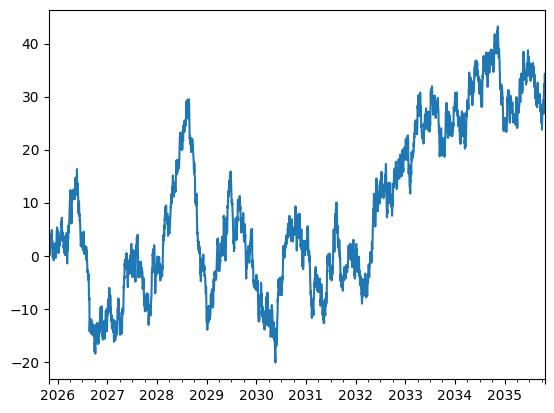

In [169]:
cumulative_series.plot()

In [170]:
cumulative_series["2027-01-01":"2029-01-01"] = np.nan

<Axes: >

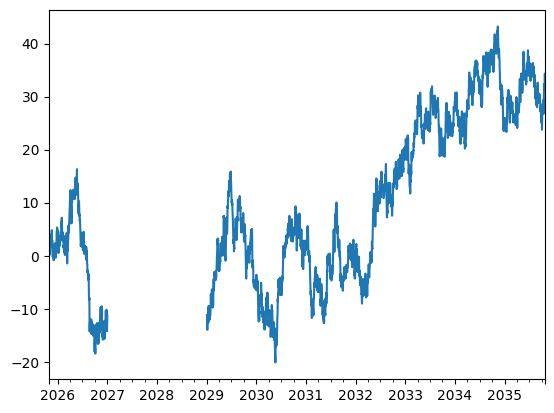

In [171]:
cumulative_series.plot()

In [172]:
# we can use rolling method to calculate rolling statistics
# we supply a window size of 90 days here
rolling_avg = cumulative_series.rolling(window=90).mean()
rolling_avg # note how there is no average for the first 90 days - NaN because of missing data

2025-10-28          NaN
2025-10-29          NaN
2025-10-30          NaN
2025-10-31          NaN
2025-11-01          NaN
                ...    
2035-10-21    30.287497
2035-10-22    30.258208
2035-10-23    30.232627
2035-10-24    30.229361
2035-10-25    30.200968
Freq: D, Length: 3650, dtype: float64

<Axes: >

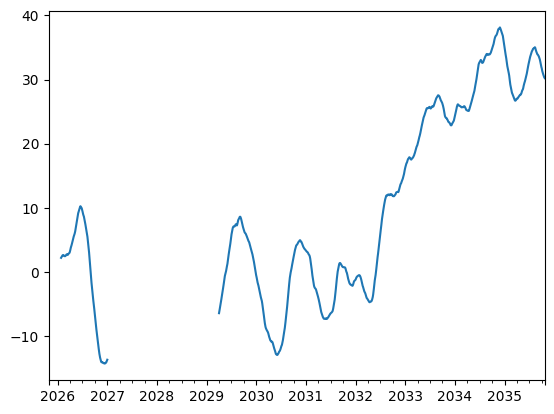

In [173]:
rolling_avg.plot()

---

## Papildus resursi

- Dokumentācija: http://pandas.pydata.org/pandas-docs/stable/
- Pandas Cheat Sheet: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

- https://www.dataschool.io/easier-data-analysis-with-pandas/ (video)

- Apmācības materiāli: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html
  - ["Getting started"](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html) - see also the "10 minutes to pandas" section
  - ["Modern Pandas"](http://tomaugspurger.github.io/modern-1-intro.html) tutorial
  - [Python Data Science Handbook - Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)